# Proof-of-Concept

In [1]:
from configs.config import get_path
import src.utils.nervousness_comparator as nerv_comparator
import pandas as pd

In [7]:
data_path = get_path("data", "lp_tardiness")

file_template = "{prefix}_schedule_{day:02d}.csv"

'C:\\Users\\konra\\Coding\\HTWD_Minimalinvasives_Job-Shop_Scheduling\\data\\lp_tardiness/6b_schedule_01.csv'

In [4]:
file = "02_tardiness_init_plan.csv"

In [5]:
df_plan_init =  pd.read_csv(data_path / file)
df_plan_init = df_plan_init.sort_values(by=["Arrival", "Start"]).reset_index(drop=True)
df_plan_init

,Job,Operation,Arrival,Deadline,Machine,Start,Processing Time,End,Tardiness
0,Job_000,0,0.00,1381.052676,M0,0.00,29.0,29.00,0.00
1,Job_000,1,0.00,1381.052676,M1,29.00,78.0,107.00,0.00
2,Job_000,2,0.00,1381.052676,M2,107.00,9.0,116.00,0.00
3,Job_000,3,0.00,1381.052676,M3,116.00,36.0,152.00,0.00
4,Job_000,4,0.00,1381.052676,M4,152.00,49.0,201.00,0.00
...,...,...,...,...,...,...,...,...,...
565,Job_056,5,4234.37,6122.391379,M9,6084.81,76.0,6160.81,38.42
566,Job_056,6,4234.37,6122.391379,M5,6160.81,47.0,6207.81,85.42
567,Job_056,7,4234.37,6122.391379,M3,6207.81,52.0,6259.81,137.42
568,Job_056,8,4234.37,6122.391379,M4,6259.81,90.0,6349.81,227.42


### Bicriterial Tag 1

In [7]:
file_template_dp = "{prefix}_schedule_{day:02d}_devpen.csv"

In [8]:
file = file_template_dp.format(prefix="3b",day=1)
file 

'data/6b_schedule_01_devpen.csv'

In [9]:
df_plan_01_devpen = pd.read_csv(data_path / file)
df_plan_01_devpen = df_plan_01_devpen.sort_values(by=["Arrival", "Start"]).reset_index(drop=True)
df_plan_01_devpen

,Job,Operation,Arrival,Deadline,Machine,Start,Processing Time,End,Tardiness
0,Job_001,9,83.42,1866.551303,M8,1534.22,30.0,1564.22,0.00
1,Job_003,8,197.03,2487.130006,M9,1561.64,22.0,1583.64,0.00
2,Job_003,9,197.03,2487.130006,M5,1611.46,43.0,1654.46,0.00
3,Job_007,8,488.49,2373.015043,M7,1583.22,36.0,1619.22,0.00
4,Job_007,9,488.49,2373.015043,M3,2001.64,79.0,2080.64,0.00
...,...,...,...,...,...,...,...,...,...
656,Job_075,5,5674.37,7562.391379,M9,8604.81,76.0,8680.81,1118.42
657,Job_075,6,5674.37,7562.391379,M5,8680.81,47.0,8727.81,1165.42
658,Job_075,7,5674.37,7562.391379,M3,8727.81,52.0,8779.81,1217.42
659,Job_075,8,5674.37,7562.391379,M4,8779.81,90.0,8869.81,1307.42


### Simple Tag 1

In [11]:
file = file_template.format(prefix="6a",day=1)

df_plan_01 = pd.read_csv(data_path / file)
df_plan_01 = df_plan_01.sort_values(by=["Arrival", "Start"]).reset_index(drop=True)
df_plan_01

,Job,Operation,Arrival,Deadline,Machine,Start,Processing Time,End,Tardiness
0,Job_001,9,83.42,1866.551303,M8,1534.22,30.0,1564.22,0.00
1,Job_003,8,197.03,2487.130006,M9,1561.64,22.0,1583.64,0.00
2,Job_003,9,197.03,2487.130006,M5,1583.64,43.0,1626.64,0.00
3,Job_007,8,488.49,2373.015043,M7,1534.22,36.0,1570.22,0.00
4,Job_007,9,488.49,2373.015043,M3,1718.64,79.0,1797.64,0.00
...,...,...,...,...,...,...,...,...,...
656,Job_075,5,5674.37,7562.391379,M9,8049.64,76.0,8125.64,563.25
657,Job_075,6,5674.37,7562.391379,M5,8125.64,47.0,8172.64,610.25
658,Job_075,7,5674.37,7562.391379,M3,8172.64,52.0,8224.64,662.25
659,Job_075,8,5674.37,7562.391379,M4,8224.64,90.0,8314.64,752.25


## I) Abweichung vom Wunschtermin (Deadline)
> Tardiness

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

def compare_and_plot_tardiness(df_a, df_b,
                               label_a='simple regeneration',
                               label_b='rescheduling with deviation penalty',
                               col_job='Job',
                               col_arrival='Arrival',
                               col_tardiness='Tardiness',
                               y_step=480,
                               figsize=(16, 8),
                               rotation=90,
                               show_regression=True):
    color_a = 'tab:blue'
    color_b = 'tab:olive'
    
    color_a_dark = 'darkblue'
    color_b_dark = 'tab:green'

    # Spaltennamen dynamisch aus Labels
    col_tardiness_a = f'Tardiness_{label_a.replace(" ", "_")}'
    col_tardiness_b = f'Tardiness_{label_b.replace(" ", "_")}'

    # Umbenennen
    df_a = df_a.rename(columns={col_tardiness: col_tardiness_a})
    df_b = df_b.rename(columns={col_tardiness: col_tardiness_b})

    # Merge
    df_compare = pd.merge(df_a, df_b, on=col_job, how='outer', suffixes=('_x', '_y'))
    df_compare['Arrival'] = df_compare[[f'{col_arrival}_x', f'{col_arrival}_y']].max(axis=1, skipna=True)
    df_compare.drop(columns=[f'{col_arrival}_x', f'{col_arrival}_y'], inplace=True)

    # Sortieren
    df_sorted = df_compare.sort_values(by='Arrival').reset_index(drop=True)
    x = np.arange(len(df_sorted)).reshape(-1, 1)
    jobs = df_sorted[col_job]

    # Y-Achsen-Ticks
    y_max = max(df_sorted[col_tardiness_a].max(), df_sorted[col_tardiness_b].max())
    y_ticks = np.arange(0, y_max + y_step, y_step)
    
    # Plot
    plt.figure(figsize=figsize)
    plt.plot(x, df_sorted[col_tardiness_a], marker='.', linestyle='--', label=label_a, color=color_a)
    plt.plot(x, df_sorted[col_tardiness_b], marker='*', linestyle='--', label=label_b, color=color_b)

    # Regressionslinien hinzufügen
    if show_regression:
        model_a = LinearRegression().fit(x, df_sorted[col_tardiness_a])
        model_b = LinearRegression().fit(x, df_sorted[col_tardiness_b])
        plt.plot(x, model_a.predict(x), linestyle='-', color=color_a_dark, label=f'{label_a} Trend')
        plt.plot(x, model_b.predict(x), linestyle='-', color=color_b_dark, label=f'{label_b} Trend')

    # Achsen und Layout
    plt.xlabel(f'{col_job} (sortiert nach {col_arrival})')
    plt.ylabel('Tardiness')
    plt.title(f'Tardiness-Vergleich ({label_a} vs. {label_b})')
    plt.xticks(ticks=x.flatten(), labels=jobs, rotation=rotation)
    plt.yticks(y_ticks)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    return df_compare


In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

def compare_and_plot_tardiness(df_a, df_b,
                               label_a='simple regeneration',
                               label_b='rescheduling with deviation penalty',
                               col_job='Job',
                               col_arrival='Arrival',
                               col_tardiness='Tardiness',
                               y_step=480,
                               figsize=(16, 8),
                               rotation=90,
                               show_regression=True):
    color_a = 'tab:blue'
    color_b = 'tab:olive'
    color_a_dark = 'darkblue'
    color_b_dark = 'tab:green'

    # Spaltennamen dynamisch aus Labels
    col_tardiness_a = f'Tardiness_{label_a.replace(" ", "_")}'
    col_tardiness_b = f'Tardiness_{label_b.replace(" ", "_")}'

    # Umbenennen
    df_a = df_a.rename(columns={col_tardiness: col_tardiness_a})
    df_b = df_b.rename(columns={col_tardiness: col_tardiness_b})

    # Merge
    df_compare = pd.merge(df_a, df_b, on=col_job, how='outer', suffixes=('_x', '_y'))
    df_compare['Arrival'] = df_compare[[f'{col_arrival}_x', f'{col_arrival}_y']].max(axis=1, skipna=True)
    df_compare.drop(columns=[f'{col_arrival}_x', f'{col_arrival}_y'], inplace=True)

    # Sortieren
    df_sorted = df_compare.sort_values(by='Arrival').reset_index(drop=True)
    x = np.arange(len(df_sorted)).reshape(-1, 1)
    jobs = df_sorted[col_job]

    # === Spezialbehandlung fehlender Werte ===
    mid_index = len(df_sorted) // 2
    mask_nan = df_sorted[col_tardiness_a].isna() | df_sorted[col_tardiness_b].isna()

    # Erste Hälfte: ersetze NaNs durch 0
    first_half = df_sorted.iloc[:mid_index].copy()
    first_half.loc[:, [col_tardiness_a, col_tardiness_b]] = \
        first_half[[col_tardiness_a, col_tardiness_b]].fillna(0)

    # Zweite Hälfte: entferne Zeilen mit NaN (nach Anzeige)
    second_half = df_sorted.iloc[mid_index:].copy()
    nan_rows = second_half[mask_nan.iloc[mid_index:]]

    if not nan_rows.empty:
        print("Entfernte Zeilen mit NaN in der zweiten Hälfte:")
        print(nan_rows[[col_job, col_tardiness_a, col_tardiness_b]])

    second_half = second_half[~mask_nan.iloc[mid_index:]]

    # Zusammenfügen
    df_sorted = pd.concat([first_half, second_half], ignore_index=True)
    x = np.arange(len(df_sorted)).reshape(-1, 1)
    jobs = df_sorted[col_job]

    # Y-Achsen-Ticks
    y_max = max(df_sorted[col_tardiness_a].max(), df_sorted[col_tardiness_b].max())
    y_ticks = np.arange(0, y_max + y_step, y_step)

    # Plot
    plt.figure(figsize=figsize)
    plt.plot(x, df_sorted[col_tardiness_a], marker='.', linestyle='--', label=label_a, color=color_a)
    plt.plot(x, df_sorted[col_tardiness_b], marker='*', linestyle='--', label=label_b, color=color_b)

    # Regressionslinien hinzufügen
    if show_regression:
        mask_a = df_sorted[col_tardiness_a].notna()
        x_a = x[mask_a]
        y_a = df_sorted.loc[mask_a, col_tardiness_a]

        mask_b = df_sorted[col_tardiness_b].notna()
        x_b = x[mask_b]
        y_b = df_sorted.loc[mask_b, col_tardiness_b]

        model_a = LinearRegression().fit(x_a, y_a)
        model_b = LinearRegression().fit(x_b, y_b)

        plt.plot(x_a, model_a.predict(x_a), linestyle='-', color=color_a_dark, label=f'{label_a} Trend')
        plt.plot(x_b, model_b.predict(x_b), linestyle='-', color=color_b_dark, label=f'{label_b} Trend')

    # Achsen und Layout
    plt.xlabel(f'{col_job} (sortiert nach {col_arrival})')
    plt.ylabel('Tardiness')
    plt.title(f'Tardiness-Vergleich ({label_a} vs. {label_b})')
    plt.xticks(ticks=x.flatten(), labels=jobs, rotation=rotation)
    plt.yticks(y_ticks)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    return df_sorted


In [15]:
last_ops_dev = df_plan_01_devpen.sort_values(['Job', 'Operation']).drop_duplicates('Job', keep='last')
last_ops_simple = df_plan_01.sort_values(['Job', 'Operation']).drop_duplicates('Job', keep='last')

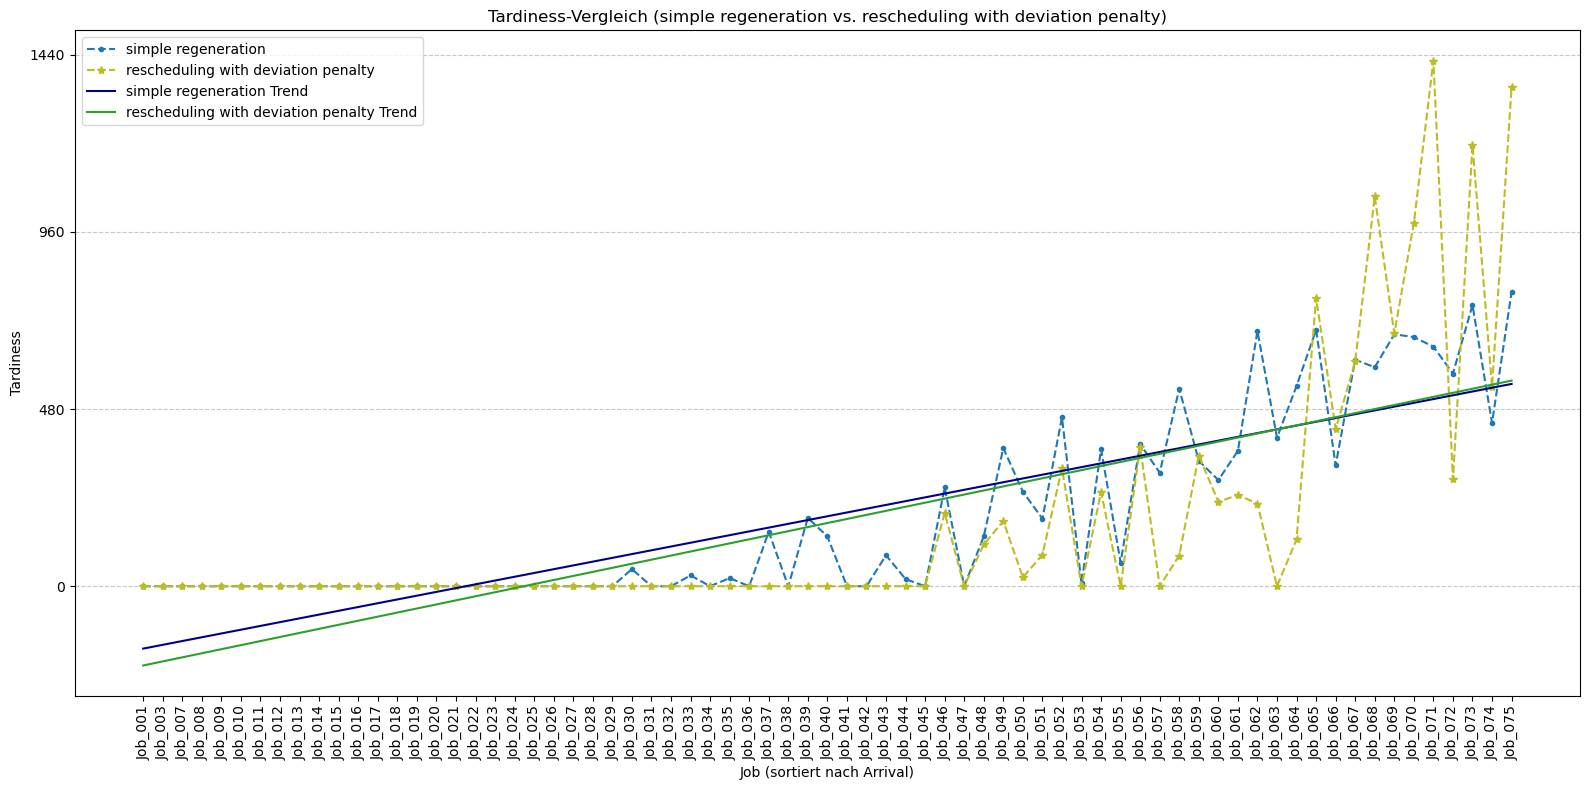

In [16]:
df_compare = compare_and_plot_tardiness(
    last_ops_simple,
    last_ops_dev,
)


### Tag 2

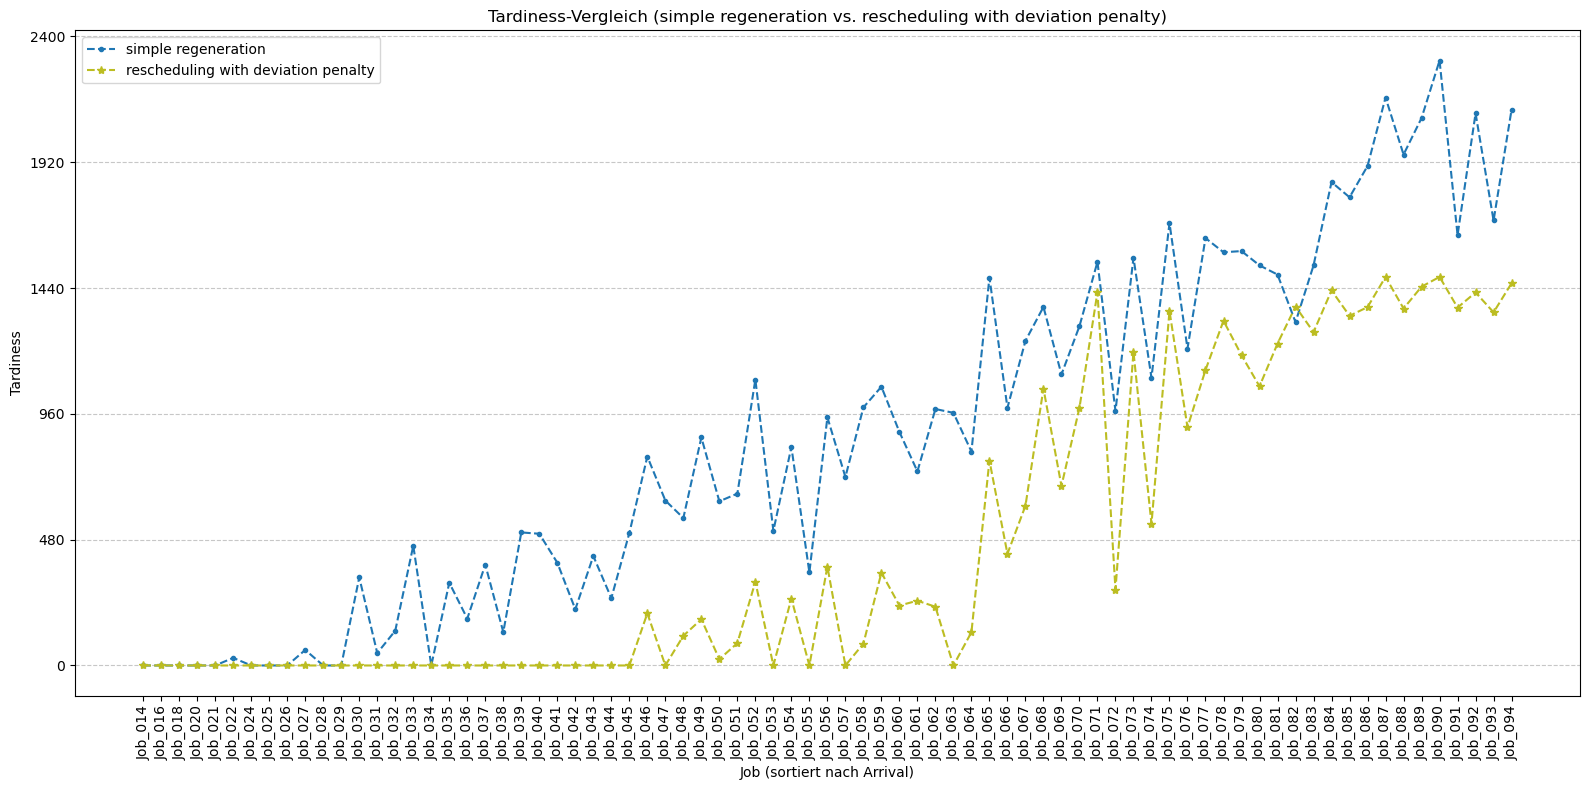

In [29]:
file = file_template.format(prefix="6a",day=2)
df_plan_02 = pd.read_csv(data_path / file)


file = file_template_dp.format(prefix="6b",day=2)
df_plan_02_devpen = pd.read_csv(data_path / file)

last_ops_simple = df_plan_02.sort_values(['Job', 'Operation']).drop_duplicates('Job', keep='last')
last_ops_dev = df_plan_02_devpen.sort_values(['Job', 'Operation']).drop_duplicates('Job', keep='last')

df_compare = compare_and_plot_tardiness(
    last_ops_simple,
    last_ops_dev,
    show_regression=False
)

### Tag 3

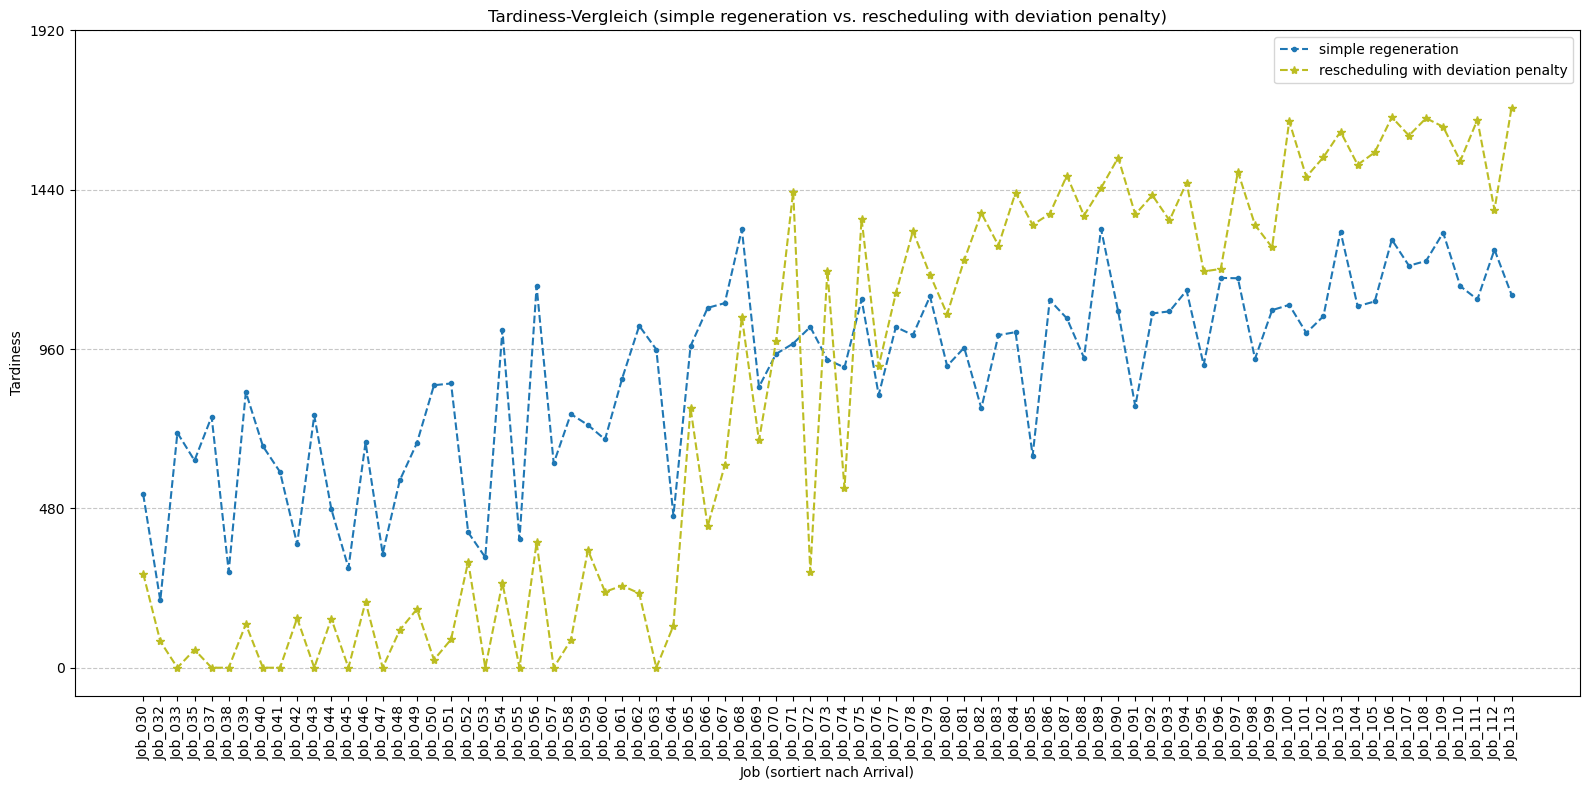

In [31]:
file = file_template.format(prefix="6a",day=3)
df_plan_03 = pd.read_csv(data_path / file)


file = file_template_dp.format(prefix="6b",day=3)
df_plan_03_devpen = pd.read_csv(data_path / file)

last_ops_simple = df_plan_03.sort_values(['Job', 'Operation']).drop_duplicates('Job', keep='last')
last_ops_dev = df_plan_03_devpen.sort_values(['Job', 'Operation']).drop_duplicates('Job', keep='last')

df_compare = compare_and_plot_tardiness(
    last_ops_simple,
    last_ops_dev,
    show_regression=False
)

## II) Plan-Nervosität

### a) Hwango

### Tag 1

In [35]:
T1 = 1440
P_T_simple, details = nerv_comparator.compute_P_T(df_plan_init, df_plan_01, T1, verbose=False)
P_T_simple

29748.528358856325

In [36]:
P_T_devpen, details = nerv_comparator.compute_P_T(df_plan_init, df_plan_01_devpen, T1, verbose=False)
P_T_devpen

10196.605037534502

### Tag 2

In [38]:
T1 = 1440*2
P_T_simple, details = nerv_comparator.compute_P_T(df_plan_01, df_plan_02, T1, verbose=False)
P_T_simple

124738.12215314954

In [39]:
P_T_devpen, details = nerv_comparator.compute_P_T(df_plan_01_devpen, df_plan_02_devpen, T1, verbose=False)
P_T_devpen

1631.4575838635621

### Tag 3

In [41]:
T1 = 1440*3
P_T_simple, details = nerv_comparator.compute_P_T(df_plan_02, df_plan_03, T1, verbose=False)
P_T_simple

118195.46645627575

In [42]:
P_T_devpen, details = nerv_comparator.compute_P_T(df_plan_02_devpen, df_plan_03_devpen, T1, verbose=False)
P_T_devpen

2184.523896700484

In [43]:
 details

,Job,Operation,Start_plan,Start_rev,delta_t,g,contrib
18,Job_044,7,4320.81,4485.61,164.80,0.999820,164.770351
19,Job_035,7,4329.81,4448.81,119.00,0.997823,118.740980
20,Job_039,7,4329.81,4583.81,254.00,0.997823,253.447133
21,Job_033,3,4351.81,4325.61,26.20,0.992960,26.015549
22,Job_040,1,4351.81,4351.81,0.00,0.992960,0.000000
...,...,...,...,...,...,...,...
558,Job_094,8,10325.81,10328.81,3.00,0.163806,0.491417
559,Job_090,7,10407.81,10462.81,55.00,0.156215,8.591841
560,Job_094,9,10415.81,10418.81,3.00,0.155478,0.466434
561,Job_090,8,10595.82,10595.82,0.00,0.139035,0.000000


### b) Wu

In [45]:
import pandas as pd

def calculate_total_deviation_wu(
    df_original: pd.DataFrame,
    df_new: pd.DataFrame,
    job_col: str = "Job",
    op_col: str = "Operation",
    start_col: str = "Start"
) -> float:
    """
    Berechnet die Gesamtabweichung der Startzeiten zwischen dem neuen und ursprünglichen Plan.

    Parameter:
    - df_new: DataFrame mit Spalten für Job, Operation und Startzeit (neuer Plan)
    - df_original: DataFrame mit Spalten für Job, Operation und Startzeit (ursprünglicher Plan)
    - job_col, op_col, start_col: Spaltennamen für Job, Operation und Startzeit

    Rückgabe:
    - Gesamt-Deviation (float): Summe der absoluten Abweichungen
    """
    # Join nach Job und Operation
    merged = pd.merge(
        df_new[[job_col, op_col, start_col]],
        df_original[[job_col, op_col, start_col]],
        on=[job_col, op_col],
        suffixes=('_new', '_orig')
    )

    # Abweichung berechnen
    merged['Deviation'] = (merged[f"{start_col}_new"] - merged[f"{start_col}_orig"]).abs()

    return merged['Deviation'].sum()


### Tag 1

In [47]:
calculate_total_deviation_wu(df_plan_init, df_plan_01)

56656.30999999999

In [48]:
calculate_total_deviation_wu(df_plan_init, df_plan_01_devpen)

18228.949999999993

### Tag 2

In [50]:
calculate_total_deviation_wu(df_plan_01, df_plan_02)

248044.70999999988

In [51]:
calculate_total_deviation_wu(df_plan_01_devpen, df_plan_02_devpen)

1987.8400000000138

### Tag 3

In [53]:
calculate_total_deviation_wu(df_plan_02, df_plan_03)

332059.9399999999

In [54]:
calculate_total_deviation_wu(df_plan_02_devpen, df_plan_03_devpen)

6901.690000000002

In [55]:
def calculate_first_last_deviation_per_job(
    df_original: pd.DataFrame,
    df_new: pd.DataFrame,
    job_col: str = "Job",
    op_col: str = "Operation",
    start_col: str = "Start"
) -> pd.DataFrame:
    """
    Berechnet die Abweichung der ersten und letzten Operation je Job.

    Rückgabe:
    - DataFrame mit ['Job', 'FirstDeviation', 'LastDeviation']
    """

    # Merge nach Job und Operation
    merged = pd.merge(
        df_new[[job_col, op_col, start_col]],
        df_original[[job_col, op_col, start_col]],
        on=[job_col, op_col],
        suffixes=('_new', '_orig')
    )

    # Abweichung berechnen
    merged['Deviation'] = (merged[f"{start_col}_new"] - merged[f"{start_col}_orig"]).abs()

    # Sortieren für first/last Operation
    merged_sorted = merged.sort_values(by=[job_col, op_col])

    # First and last deviation je Job
    firsts = merged_sorted.groupby(job_col).first().reset_index()
    lasts = merged_sorted.groupby(job_col).last().reset_index()

    result = pd.DataFrame({
        job_col: firsts[job_col],
        'FirstDeviation': firsts['Deviation'],
        'LastDeviation': lasts['Deviation']
    })

    return result

In [56]:
import matplotlib.pyplot as plt
import numpy as np

def plot_first_last_deviation(deviation_df, job_col="Job", y_max=None, y_tick_step=480):
    """
    Plottet FirstDeviation und LastDeviation je Job als Linienplot mit fixer Y-Achse.
    
    Parameter:
    - deviation_df: DataFrame mit Spalten 'Job', 'FirstDeviation', 'LastDeviation'
    - job_col: Spaltenname für Jobs
    - y_max: fester Maximalwert für die Y-Achse (wenn None, automatische Skalierung)
    - y_tick_step: Abstand der Y-Achsenraster (z.B. 480), wenn None: Standardraster
    """
    plt.figure(figsize=(10, 5))

    x = deviation_df[job_col].astype(str)

    plt.plot(x, deviation_df['FirstDeviation'], marker='o', label='First Deviation')
    plt.plot(x, deviation_df['LastDeviation'], marker='s', label='Last Deviation')

    plt.xlabel("Job")
    plt.ylabel("Deviation")
    plt.title("First & Last Deviation per Job")
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.legend()

    if y_max is not None:
        plt.ylim(0, y_max)
        if y_tick_step is not None:
            yticks = np.arange(0, y_max + y_tick_step, y_tick_step)
            plt.yticks(yticks)

    plt.tight_layout()
    plt.show()



### Tag 1

In [59]:
deviation_simple_01 = calculate_first_last_deviation_per_job(df_plan_init, df_plan_01)
deviation_simple_01.head()

,Job,FirstDeviation,LastDeviation
0,Job_001,682.41,682.41
1,Job_003,265.83,265.83
2,Job_007,504.41,652.83
3,Job_008,59.67,153.83
4,Job_009,92.30,140.83


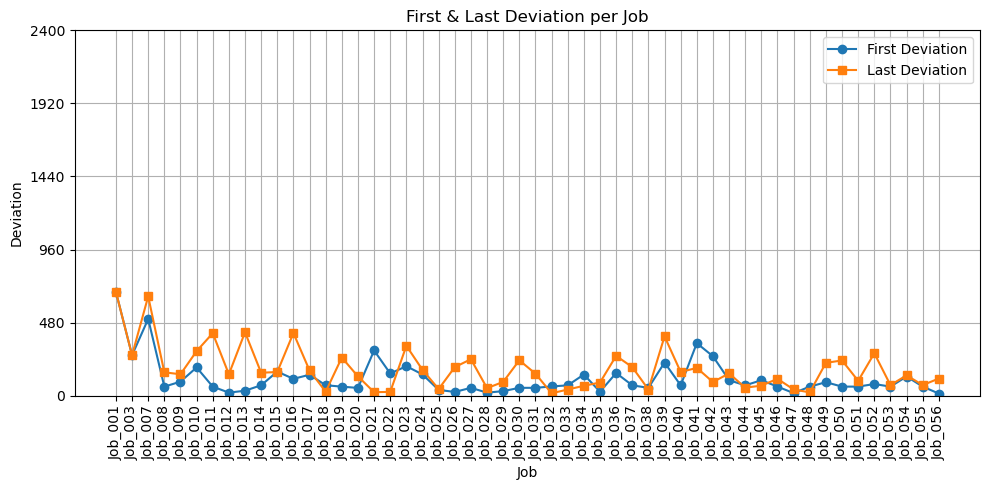

In [60]:
plot_first_last_deviation(deviation_simple_01,  y_max=2000)

In [61]:
deviation_simple_01_devpen = calculate_first_last_deviation_per_job(df_plan_init, df_plan_01_devpen)
deviation_simple_01_devpen.head()

,Job,FirstDeviation,LastDeviation
0,Job_001,682.41,682.41
1,Job_003,265.83,293.65
2,Job_007,553.41,935.83
3,Job_008,59.67,45.65
4,Job_009,170.65,295.65


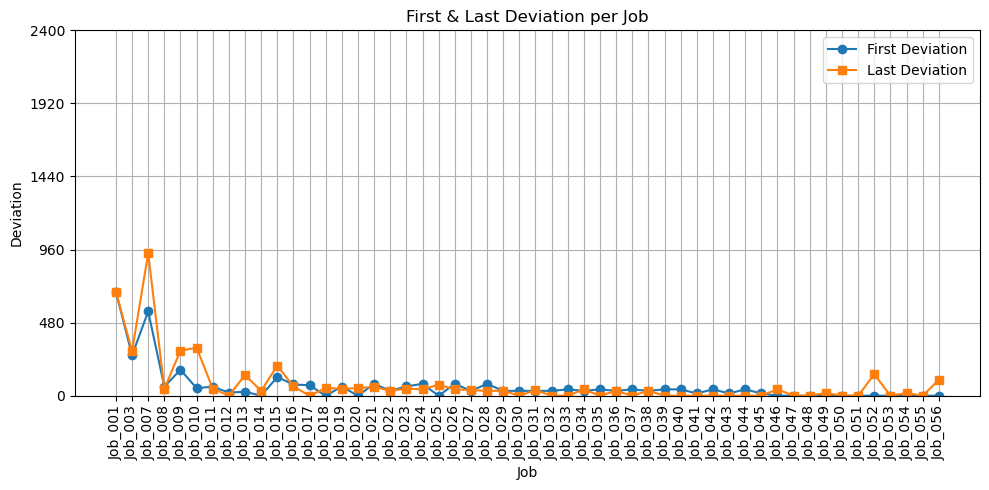

In [63]:
plot_first_last_deviation(deviation_simple_01_devpen,  y_max=2000)

### Tag 2

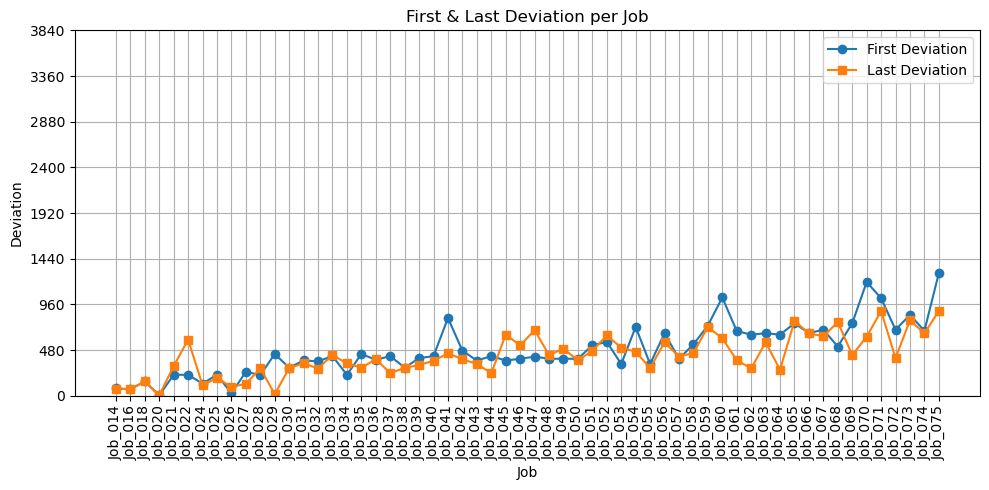

In [66]:
deviation_simple_02 = calculate_first_last_deviation_per_job(df_plan_01, df_plan_02)
plot_first_last_deviation(deviation_simple_02,  y_max=3500)

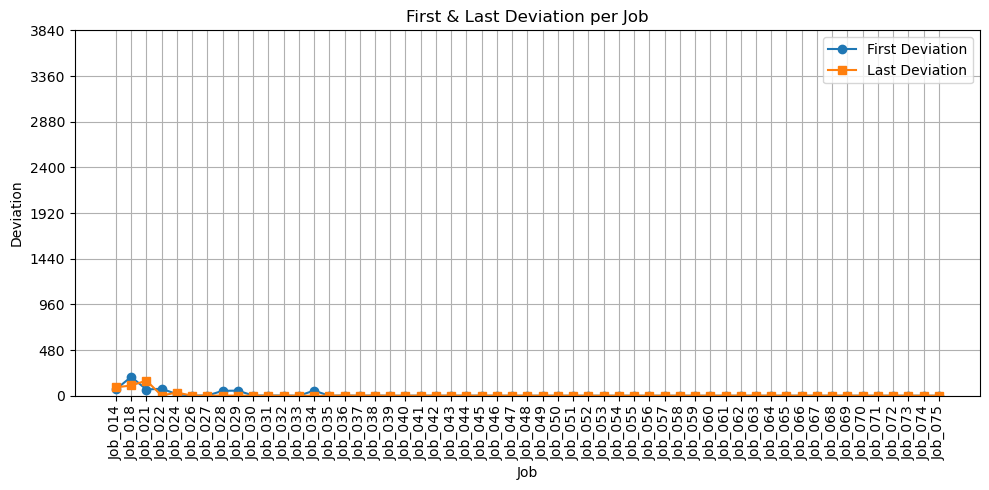

In [67]:
deviation_simple_02_devpen = calculate_first_last_deviation_per_job(df_plan_01_devpen, df_plan_02_devpen)
plot_first_last_deviation(deviation_simple_02_devpen,  y_max=3500)

### Tag 3

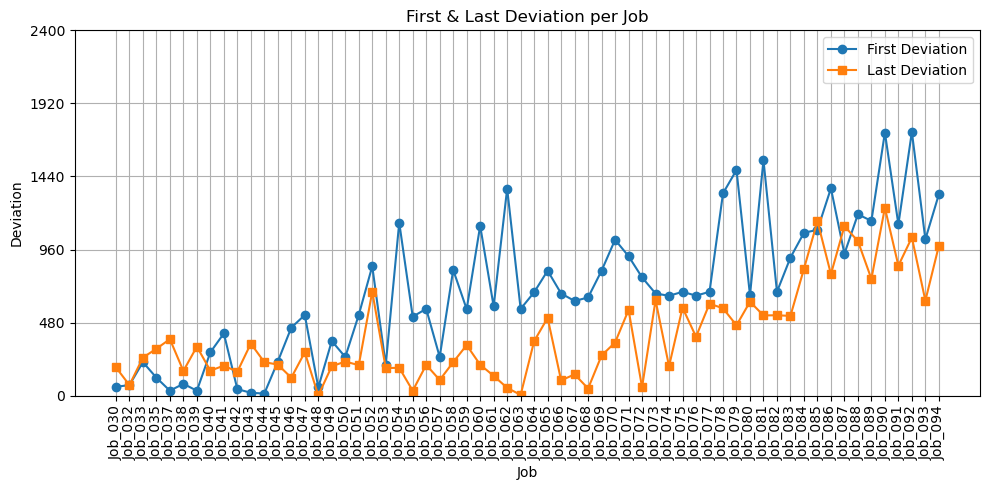

In [72]:
deviation_simple_03 = calculate_first_last_deviation_per_job(df_plan_02, df_plan_03)
plot_first_last_deviation(deviation_simple_03,  y_max=2000)

In [ ]:
deviation_simple_03_devpen = calculate_first_last_deviation_per_job(df_plan_02_devpen, df_plan_03_devpen)
plot_first_last_deviation(deviation_simple_03_devpen,  y_max=2000)